In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Understanding Data

In [82]:
data = pd.read_csv("Agrofood_co2_emission.csv")
data.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


All values are in Gg (1 Gg = 1,000 metric tons = 1,000,000 kilograms)

Savanna fires: Emissions from fires in savanna ecosystems.

Forest fires: Emissions from fires in forested areas.

Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.

Rice Cultivation: Emissions from methane released during rice cultivation.

Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.

Pesticides Manufacturing: Emissions from the production of pesticides.

Food Transport: Emissions from transporting food products.

Forestland: Land covered by forests.

Net Forest conversion: Change in forest area due to deforestation and afforestation.

Food Household Consumption: Emissions from food consumption at the household level.

Food Retail: Emissions from the operation of retail establishments selling food.

On-farm Electricity Use: Electricity consumption on farms.

Food Packaging: Emissions from the production and disposal of food packaging materials.

Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.

Food Processing: Emissions from processing food products.

Fertilizers Manufacturing: Emissions from the production of fertilizers.

IPPU: Emissions from industrial processes and product use.

Manure applied to Soils: Emissions from applying animal manure to agricultural soils.

Manure left on Pasture: Emissions from animal manure on pasture or grazing land.

Manure Management: Emissions from managing and treating animal manure.

Fires in organic soils: Emissions from fires in organic soils.

Fires in humid tropical forests: Emissions from fires in humid tropical forests.

On-farm energy use: Energy consumption on farms.

Rural population: Number of people living in rural areas.

Urban population: Number of people living in urban areas.

Total Population - Male: Total number of male individuals in the population.

Total Population - Female: Total number of female individuals in the population.

total_emission: Total greenhouse gas emissions from various sources.

Average Temperature °C (target) : The average increase of temperature (by year) in degrees CelsiuS.

In [83]:
data.dtypes

Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in hu

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

##### There are 30 different variables, most of which are float. Only 'Year' is integer and Area is an object pointing to a string. Quite a few null values for different variables. This should be treated during data pre-processing.

In [85]:
data.shape

(6965, 31)

In [86]:
data.nunique()

Area                                236
Year                                 31
Savanna fires                      3746
Forest fires                       2962
Crop Residues                      5358
Rice Cultivation                   3635
Drained organic soils (CO2)        2147
Pesticides Manufacturing           1310
Food Transport                     6512
Forestland                          605
Net Forest conversion               442
Food Household Consumption         6358
Food Retail                        6459
On-farm Electricity Use            5322
Food Packaging                     3704
Agrifood Systems Waste Disposal    6419
Food Processing                    3542
Fertilizers Manufacturing          2973
IPPU                               6026
Manure applied to Soils            5927
Manure left on Pasture             5922
Manure Management                  5931
Fires in organic soils              126
Fires in humid tropical forests    1736
On-farm energy use                 5558


In [87]:
data.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,6492.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.222000e+03,6037.000000,6965.000000,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,4847.580384,2043.210539,1626.681460,1658.629808,6018.444633,3872.724461,3035.723356,1.999150e+04,923.225603,3518.026573,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,25789.143619,8494.249260,9343.182193,11481.343725,22156.742542,19838.216846,11693.029064,1.114209e+05,3226.992039,9103.556202,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.340000,0.000100,0.001900,0.000000e+00,0.049000,0.000700,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,11.399950,26.818500,8.037600,67.631366,86.680500,209.587728,360.358799,3.903153e+01,16.303000,139.669900,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,155.471100,172.042600,29.120700,74.018133,901.275700,344.760200,1115.052400,8.037066e+02,120.443900,972.567400,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,1377.151950,1075.999100,499.944700,281.791000,3006.442100,1236.913400,2024.869900,6.155175e+03,460.120200,2430.792600,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,466288.200700,133784.065300,165676.299000,175741.306100,213289.701600,274253.512500,170826.423300,1.861641e+06,34677.360300,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [88]:
data.describe(include = "object")

,Area
count,6965
unique,236
top,Afghanistan
freq,31


In [89]:
data[data.duplicated()]

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C


In [90]:
##### There are no duplicate records

In [91]:
data["Year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [92]:
data["Area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic 

##### The dataset tells about the emissions from different agrofood activities from different regions across the world.

##### We need to Understand the relationship between Temperature rise and CO2 emmission derriving from the agri-food sector activities. Extensively investigate the relationship amongst an extensive list of agri-food processes CO2 emmisions and average temperature rise.  And Identify any potential correlations between the agri-food sector emmissions and average temperature increase.

# 2. Misssing Value treatment, Data type correction and identifiying and cleaning mispronunced data

##### There is no data type correction required and also the there is no mispronunced data in Area and Year particularly

In [93]:
# standardizing the column names

def col_standard_str(col_name):
    for c in [' °C', ' (CO2)']:
        col_name = col_name.replace(c, '')
    return col_name.lower().replace('-', ' ').replace('   ', ' ').replace(' ', '_')

data.columns = data.columns.map(col_standard_str)
data.columns

Index(['area', 'year', 'savanna_fires', 'forest_fires', 'crop_residues',
       'rice_cultivation', 'drained_organic_soils', 'pesticides_manufacturing',
       'food_transport', 'forestland', 'net_forest_conversion',
       'food_household_consumption', 'food_retail', 'on_farm_electricity_use',
       'food_packaging', 'agrifood_systems_waste_disposal', 'food_processing',
       'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils',
       'manure_left_on_pasture', 'manure_management', 'fires_in_organic_soils',
       'fires_in_humid_tropical_forests', 'on_farm_energy_use',
       'rural_population', 'urban_population', 'total_population_male',
       'total_population_female', 'total_emission', 'average_temperature'],
      dtype='object')

In [94]:
data.isnull().sum()

area                                  0
year                                  0
savanna_fires                        31
forest_fires                         93
crop_residues                      1389
rice_cultivation                      0
drained_organic_soils                 0
pesticides_manufacturing              0
food_transport                        0
forestland                          493
net_forest_conversion               493
food_household_consumption          473
food_retail                           0
on_farm_electricity_use               0
food_packaging                        0
agrifood_systems_waste_disposal       0
food_processing                       0
fertilizers_manufacturing             0
ippu                                743
manure_applied_to_soils             928
manure_left_on_pasture                0
manure_management                   928
fires_in_organic_soils                0
fires_in_humid_tropical_forests     155
on_farm_energy_use                  956


##### savanna fires, forest fires,crop_residues,forestland,net_forest_conversion,food_household_consumption,ippu,manure_applied_to_soils,manure_management,
##### fires_in_humid_tropical_forests,on_farm_energy_use has missing data.


<Axes: >

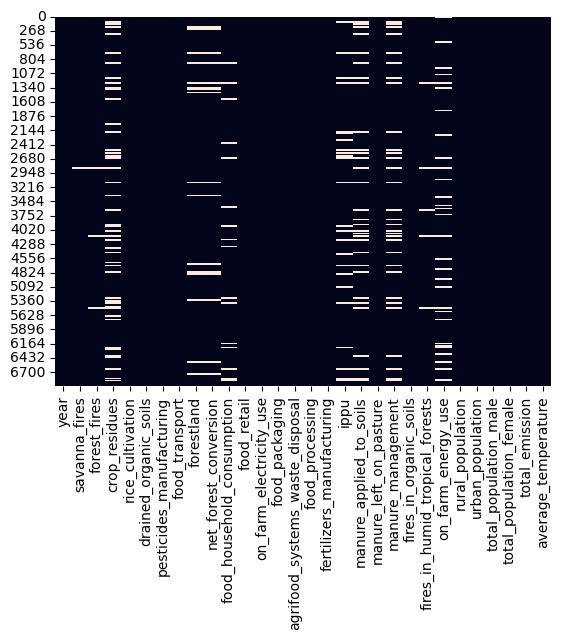

In [95]:
# Another way to check presence of missing data

data_num = data.select_dtypes(include =np.number)
sns.heatmap(data_num.isnull(),cbar=None)

In [96]:
# converting any invalid data to null
for col in data.columns:
    pd.to_numeric(data[col],errors = "coerce")

In [97]:
data.isnull().sum()

area                                  0
year                                  0
savanna_fires                        31
forest_fires                         93
crop_residues                      1389
rice_cultivation                      0
drained_organic_soils                 0
pesticides_manufacturing              0
food_transport                        0
forestland                          493
net_forest_conversion               493
food_household_consumption          473
food_retail                           0
on_farm_electricity_use               0
food_packaging                        0
agrifood_systems_waste_disposal       0
food_processing                       0
fertilizers_manufacturing             0
ippu                                743
manure_applied_to_soils             928
manure_left_on_pasture                0
manure_management                   928
fires_in_organic_soils                0
fires_in_humid_tropical_forests     155
on_farm_energy_use                  956


In [98]:
# checking missing percentage in each column if greater than 90 percent then drop that column
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_summary[missing_summary['Percentage'] > 90 ])

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


##### we are not dropping any column

In [99]:
# row wise missing percentage


# Calculate the percentage of missing values per row
data['missing_percentage'] = data.isnull().sum(axis=1) / data.shape[1] * 100

# Filter rows where the missing percentage is above a threshold
threshold = 60
data1 = data[data['missing_percentage'] >= threshold]



data1.shape




(0, 32)

##### no need to drop any rows, as there is no any row which has 60 % of null values

In [100]:
# drop missing percentage column

data.drop(columns='missing_percentage', inplace=True)

In [101]:
data.isnull().sum()

area                                  0
year                                  0
savanna_fires                        31
forest_fires                         93
crop_residues                      1389
rice_cultivation                      0
drained_organic_soils                 0
pesticides_manufacturing              0
food_transport                        0
forestland                          493
net_forest_conversion               493
food_household_consumption          473
food_retail                           0
on_farm_electricity_use               0
food_packaging                        0
agrifood_systems_waste_disposal       0
food_processing                       0
fertilizers_manufacturing             0
ippu                                743
manure_applied_to_soils             928
manure_left_on_pasture                0
manure_management                   928
fires_in_organic_soils                0
fires_in_humid_tropical_forests     155
on_farm_energy_use                  956


##### treating missing values

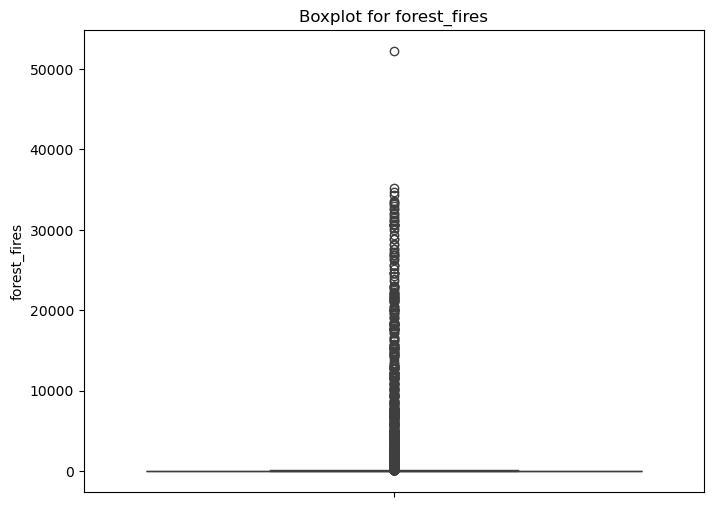

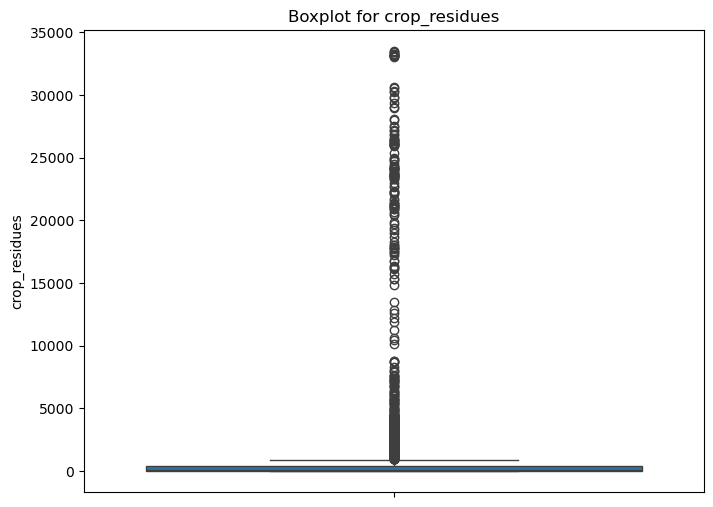

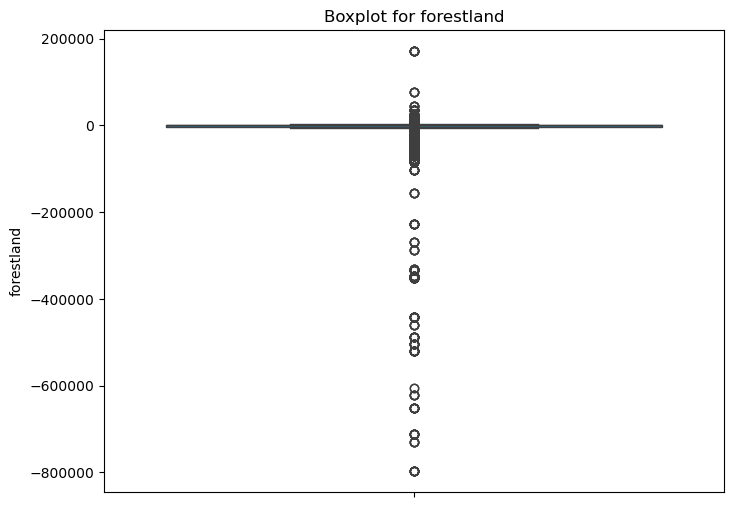

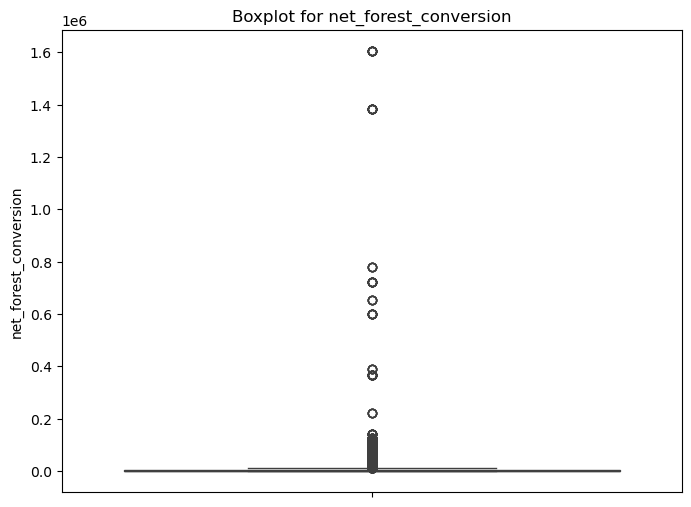

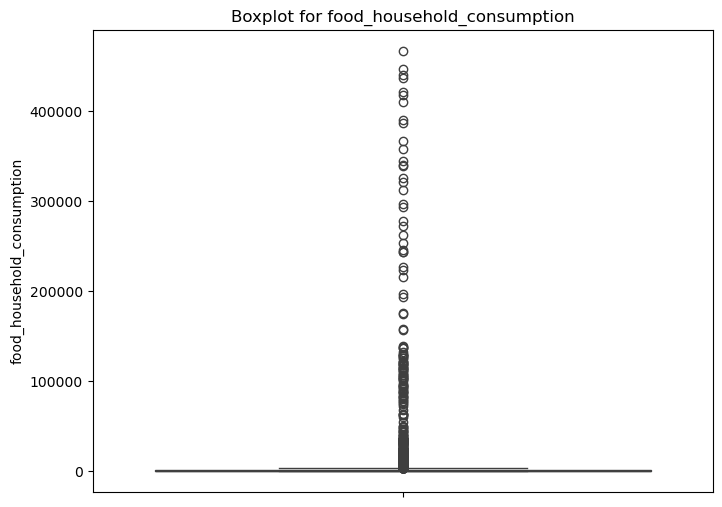

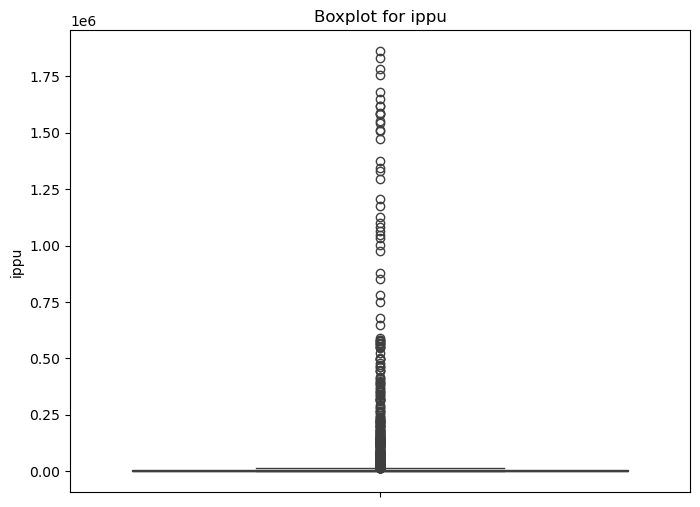

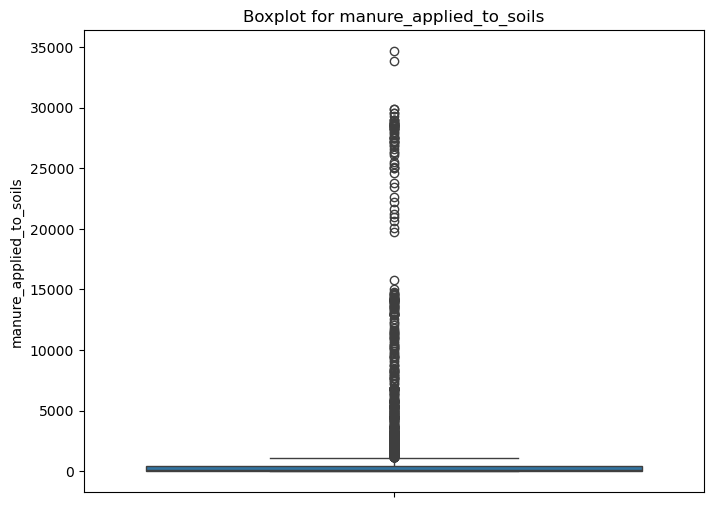

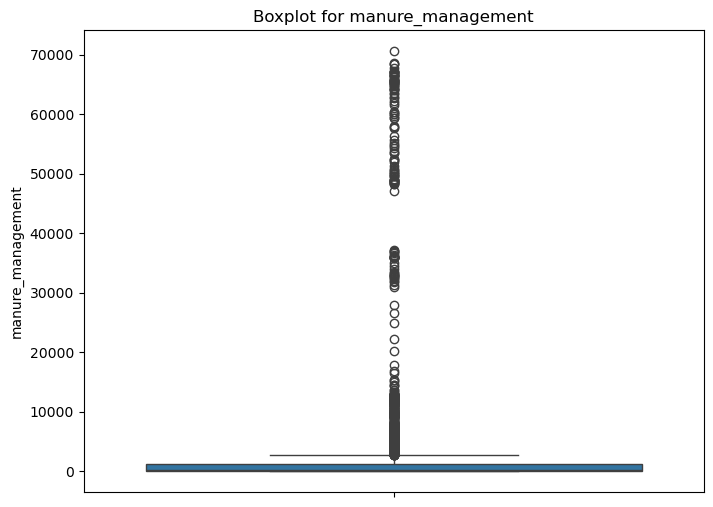

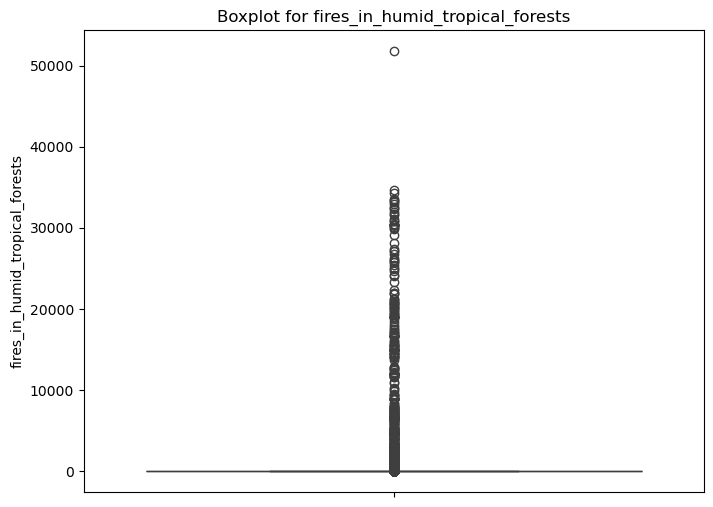

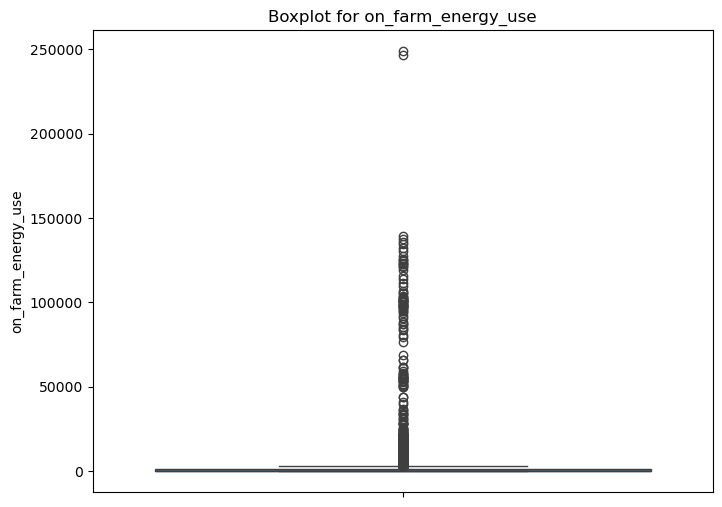

In [102]:

missing_data_col =['forest_fires','crop_residues','forestland','net_forest_conversion','food_household_consumption','ippu','manure_applied_to_soils',
                   'manure_management','fires_in_humid_tropical_forests','on_farm_energy_use']

for col in missing_data_col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=data[col])  
    plt.title(f'Boxplot for {col}')
    plt.show()  
    


In [103]:
missing_data_col =['forest_fires','crop_residues','forestland','net_forest_conversion','food_household_consumption','ippu','manure_applied_to_soils',
                   'manure_management','fires_in_humid_tropical_forests','on_farm_energy_use']

data['forest_fires'].fillna(data['forest_fires'].median(), inplace=True)
data['crop_residues'].fillna(data['crop_residues'].median(), inplace=True)
data['forestland'].fillna(data['forestland'].median(), inplace=True)
data['net_forest_conversion'].fillna(data['net_forest_conversion'].median(), inplace=True)
data['food_household_consumption'].fillna(data['food_household_consumption'].median(), inplace=True)
data['ippu'].fillna(data['ippu'].median(), inplace=True)
data['manure_applied_to_soils'].fillna(data['manure_applied_to_soils'].median(), inplace=True)
data['manure_management'].fillna(data['manure_management'].median(), inplace=True)
data['fires_in_humid_tropical_forests'].fillna(data['fires_in_humid_tropical_forests'].median(), inplace=True)
data['on_farm_energy_use'].fillna(data['on_farm_energy_use'].median(), inplace=True)

In [104]:
data.isnull().sum()

area                                0
year                                0
savanna_fires                      31
forest_fires                        0
crop_residues                       0
rice_cultivation                    0
drained_organic_soils               0
pesticides_manufacturing            0
food_transport                      0
forestland                          0
net_forest_conversion               0
food_household_consumption          0
food_retail                         0
on_farm_electricity_use             0
food_packaging                      0
agrifood_systems_waste_disposal     0
food_processing                     0
fertilizers_manufacturing           0
ippu                                0
manure_applied_to_soils             0
manure_left_on_pasture              0
manure_management                   0
fires_in_organic_soils              0
fires_in_humid_tropical_forests     0
on_farm_energy_use                  0
rural_population                    0
urban_popula

##### we have treated all the missing values and dataset is free of missing data

# Univariate analysis

In [105]:
data.describe()

,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils,pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,food_retail,on_farm_electricity_use,food_packaging,agrifood_systems_waste_disposal,food_processing,fertilizers_manufacturing,ippu,manure_applied_to_soils,manure_left_on_pasture,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on_farm_energy_use,rural_population,urban_population,total_population_male,total_population_female,total_emission,average_temperature
count,6965.000000,6934.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,907.034122,820.218691,4259.666673,3503.228636,333.418393,1939.581760,-16570.808969,1.636262e+04,4528.934628,2043.210539,1626.681460,1658.629808,6018.444633,3872.724461,3035.723356,1.794462e+04,816.264882,3518.026573,1997.737270,1210.315532,653.577094,2615.342773,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3696.660308,3330.078734,17613.825187,15861.445678,1429.159367,5616.748808,79013.974879,9.761518e+04,24925.910145,8494.249260,9343.182193,11481.343725,22156.742542,19838.216846,11693.029064,1.054759e+05,3016.661673,9103.556202,7460.634391,22669.847760,3229.846962,11779.828918,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.340000,0.000100,0.001900,0.000000e+00,0.049000,0.000700,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,25.360100,181.260800,0.000000,6.000000,27.958600,-2299.387200,0.000000e+00,13.797400,26.818500,8.037600,67.631366,86.680500,209.587728,360.358799,5.193070e+01,23.119500,139.669900,52.707800,0.000000,0.000000,17.738200,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,155.471100,172.042600,29.120700,74.018133,901.275700,344.760200,1115.052400,8.037066e+02,120.443900,972.567400,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,61.237200,264.718000,1536.640000,690.408800,116.325487,1207.000900,0.000000,3.830905e+03,1238.668800,1075.999100,499.944700,281.791000,3006.442100,1236.913400,2024.869900,4.990590e+03,379.964800,2430.792600,883.170300,0.000000,6.941800,845.713100,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,466288.200700,133784.065300,165676.299000,175741.306100,213289.701600,274253.512500,170826.423300,1.861641e+06,34677.360300,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


Year : The data is of from year 1990 to 2020 suggesting the dataset spans 31 years.

Emission Variables:
Savanna Fires and Forest Fires:
Skewed positively, with extreme max values (114,616.4 for savanna fires and 52,227.6 for forest fires). Indicates heavy outliers.
Majority of the data points are near the minimum values (25th percentile = 0 for both).

Crop Residues and Rice Cultivation:
Mean values (916.9 and 828.0, respectively) are much smaller compared to their maximums, indicating skewness or long tails.

Drained Organic Soils:
Very high variability as seen from the std (17,701.0) and a wide range between the minimum (0) and maximum (164,915.3).
Median (506.35) is far below the mean, showing possible outliers.

Total Emission:
Wide variability, ranging from -391,884 to 3,115,114 with a std of 229,509.7.
Mean emissions are around 64,541.68; however, the range suggests a mix of negative (carbon sinks) and positive (sources) values.

Population Variables (Male, Female, Total):
Populations are very high, ranging up to 1.45 billion, showing the inclusion of populous countries. This suggests you might want to normalize variables involving population.
Urban and rural populations differ significantly but contribute significantly to the total.

Emission per Person:
Low mean value (0.11) and positively skewed with maximum outliers (6.79).


Outliers
Savanna Fires, Forest Fires, and Other Emission Factors: These variables have extreme maximums compared to their mean and interquartile range, suggesting outliers.

Net Forest Conversion:
Minimum value of -797,183 indicates countries potentially restoring forests, while the maximum (1,605,106) shows countries clearing forests at a massive rate.

Statistical Relationships
Skewness (Positive/Negative Values): Features like savanna_fires and drained_organic_soils appear heavily right-skewed (long-tail distributions), indicated by differences between mean and median values.

High Standard Deviation: Variables like drained_organic_soils, total_emission, and populations exhibit significant variability, possibly indicating the influence of vastly different countries in terms of emissions and population.



In [106]:
data.describe(exclude = np.number)

,area
count,6965
unique,236
top,Afghanistan
freq,31


In [107]:
columns = [ 'savanna_fires', 'forest_fires', 'crop_residues',
       'rice_cultivation', 'drained_organic_soils', 'pesticides_manufacturing',
       'food_transport', 'forestland', 'net_forest_conversion',
       'food_household_consumption', 'food_retail', 'on_farm_electricity_use',
       'food_packaging', 'agrifood_systems_waste_disposal', 'food_processing',
       'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils',
       'manure_left_on_pasture', 'manure_management', 'fires_in_organic_soils',
       'fires_in_humid_tropical_forests', 'on_farm_energy_use',
       'rural_population', 'urban_population', 'total_population_male',
       'total_population_female', 'total_emission', 'average_temperature',]

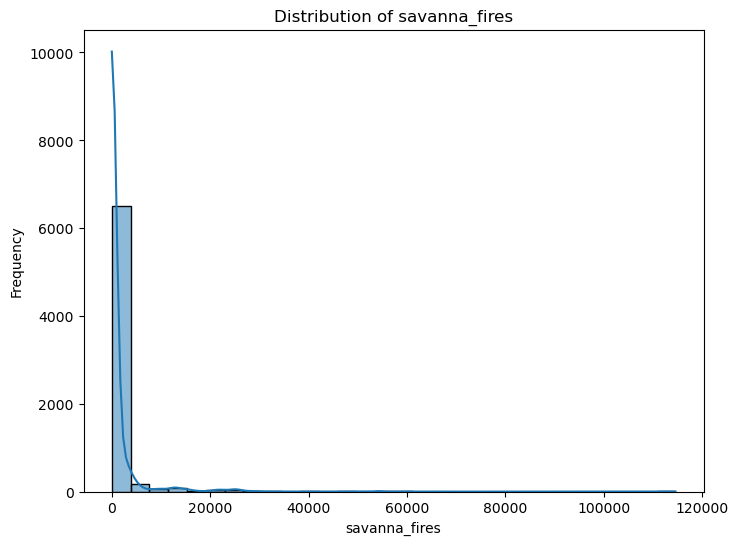

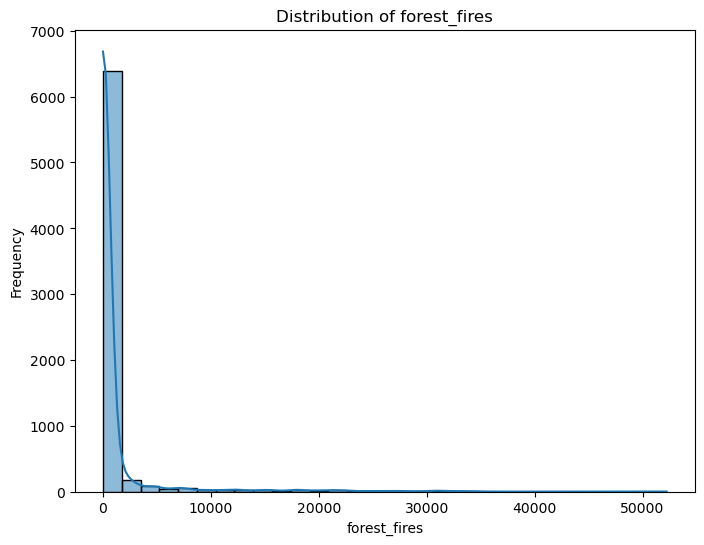

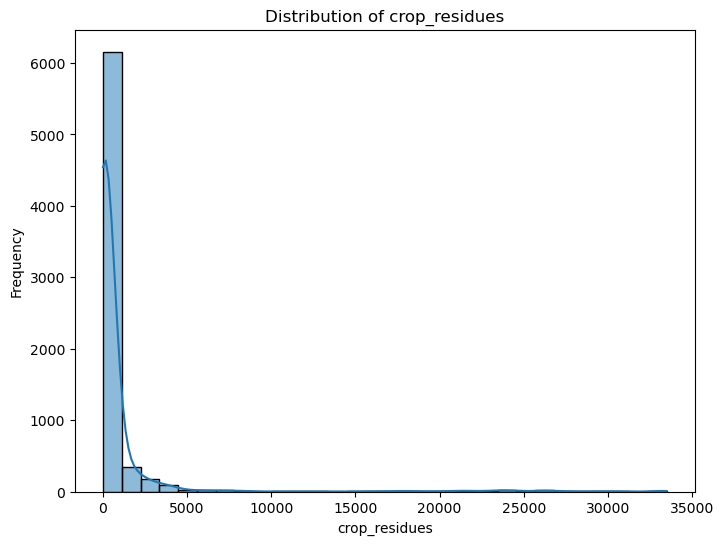

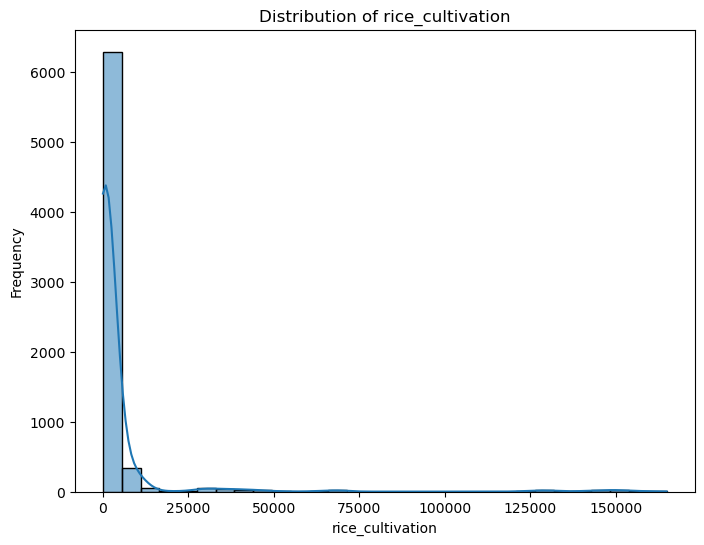

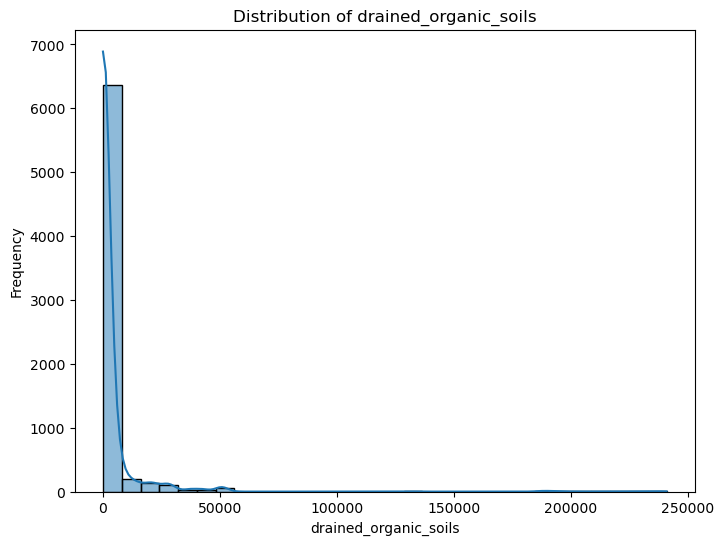

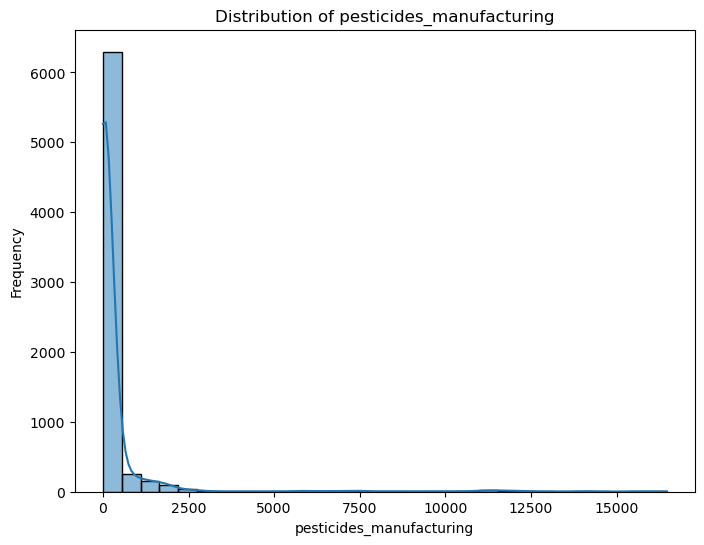

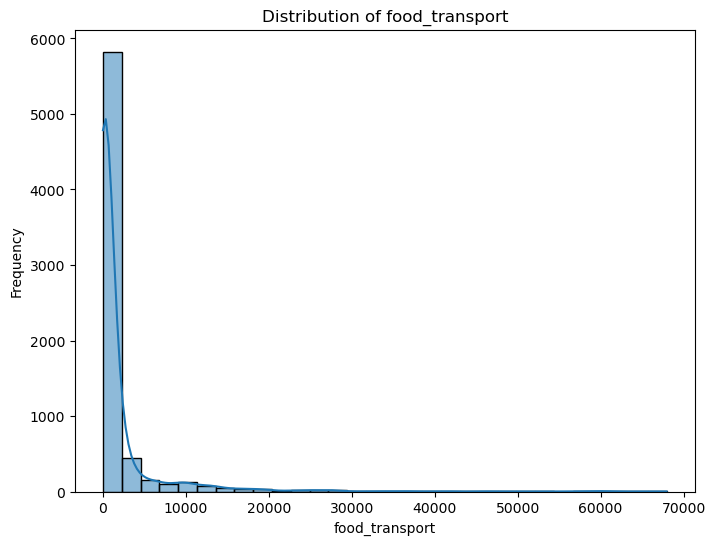

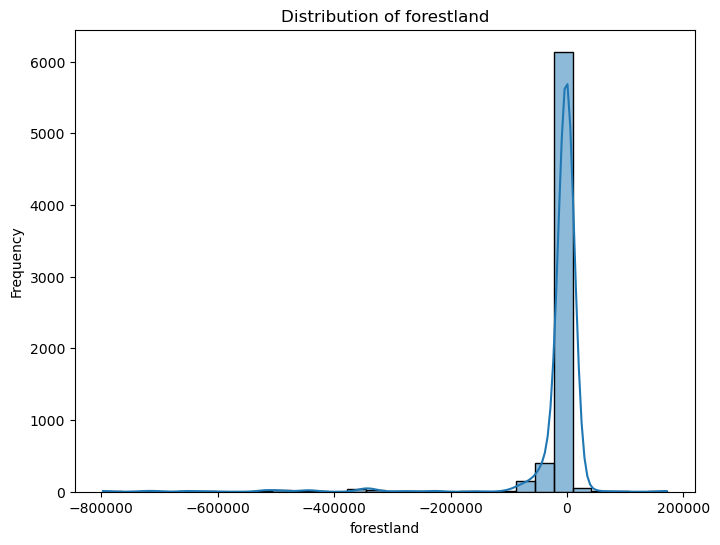

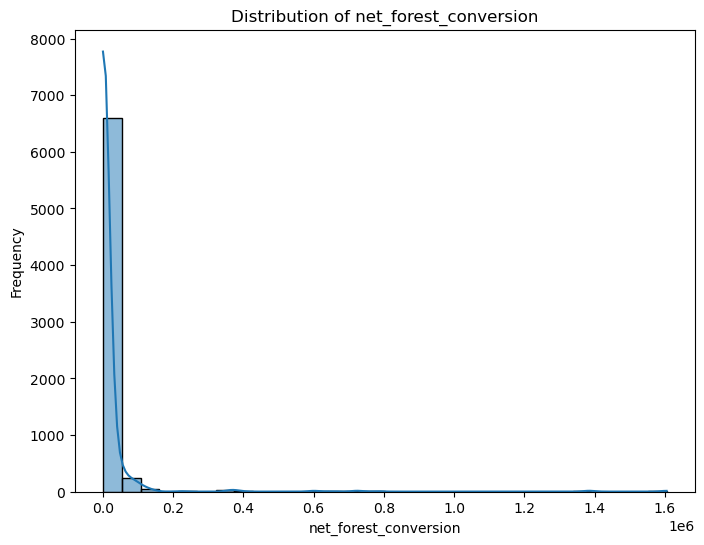

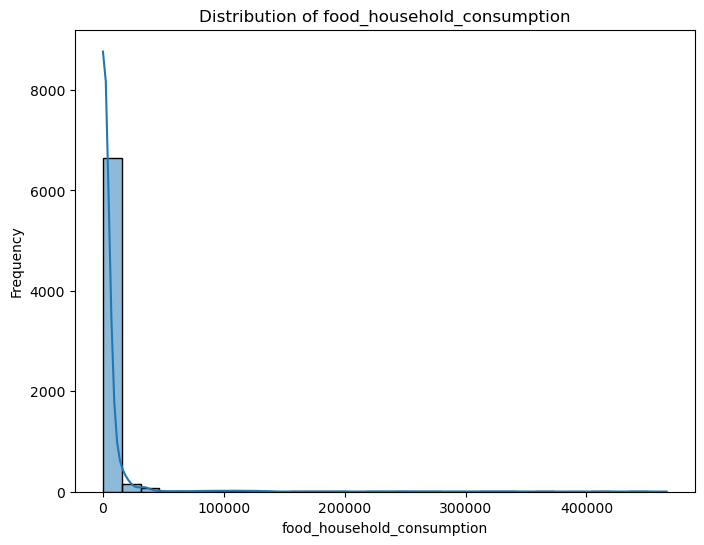

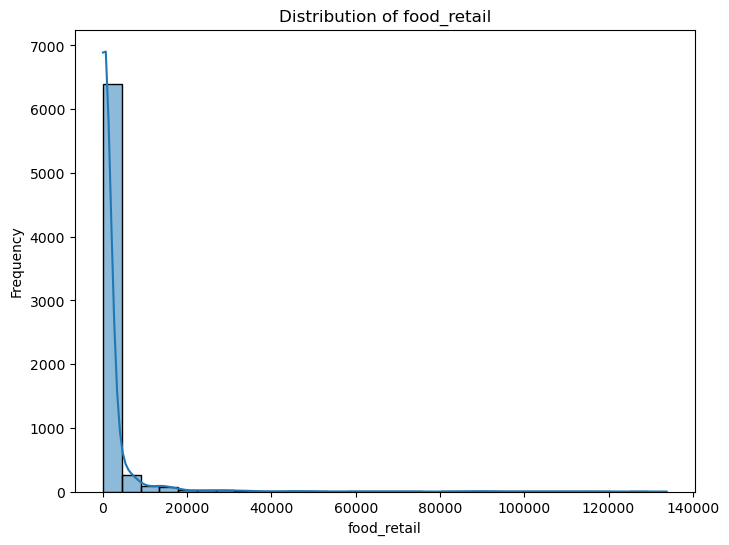

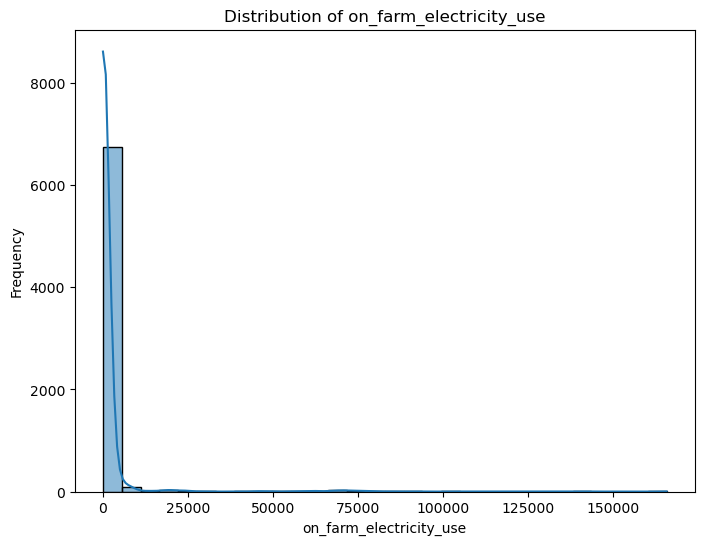

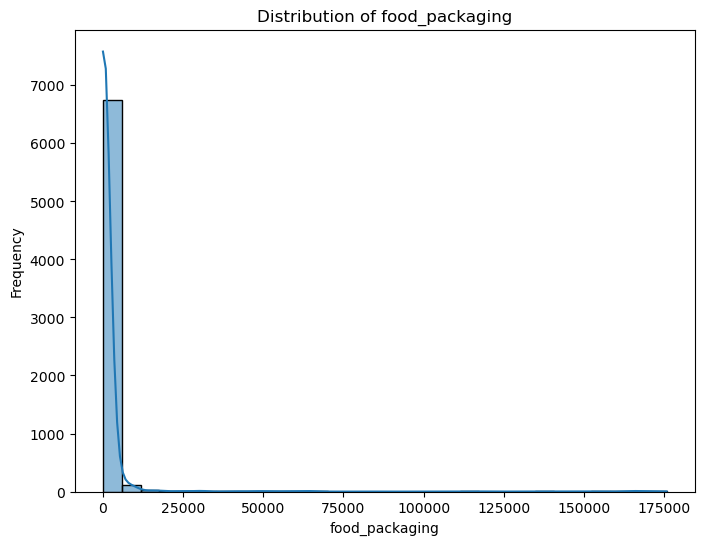

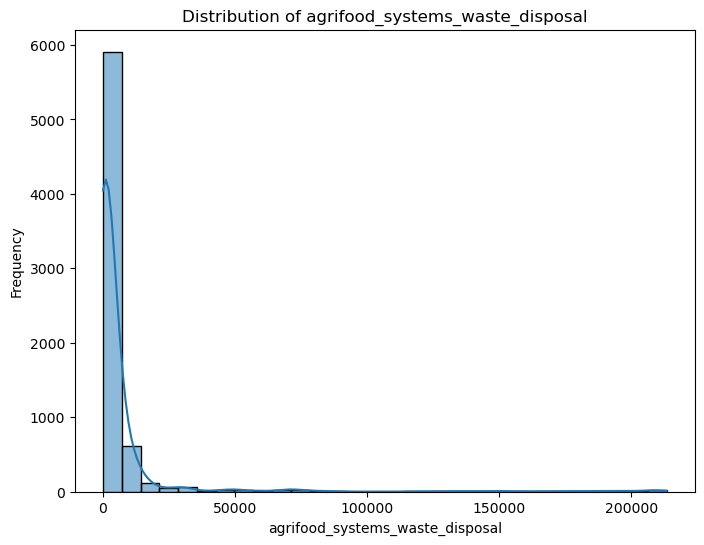

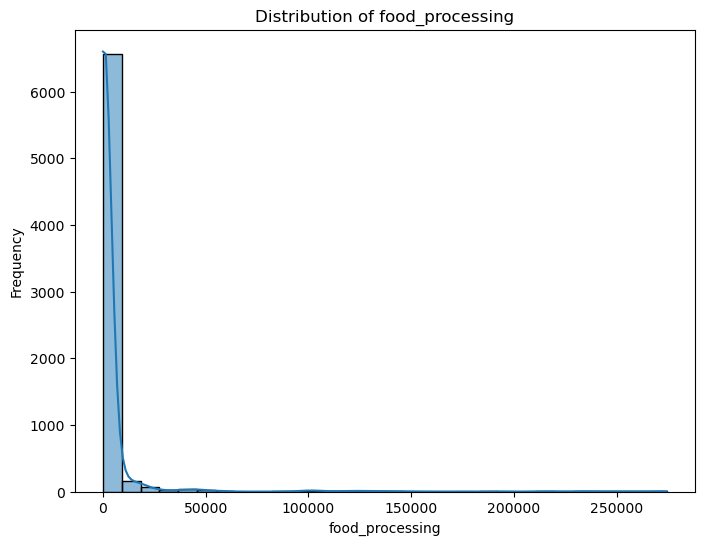

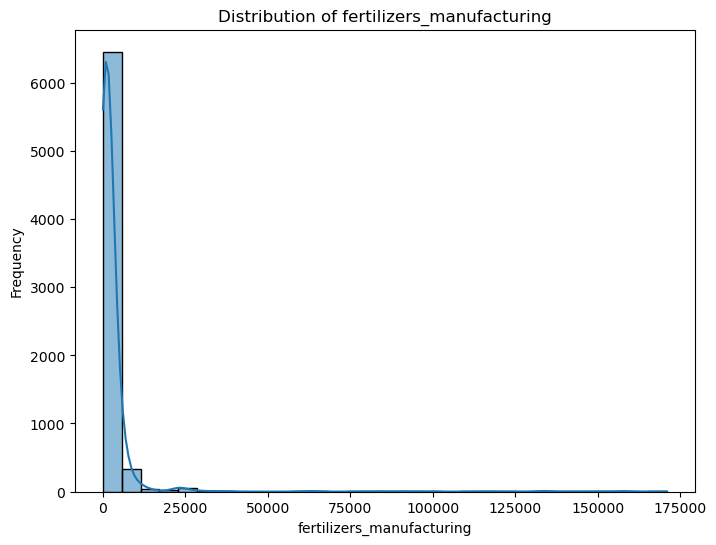

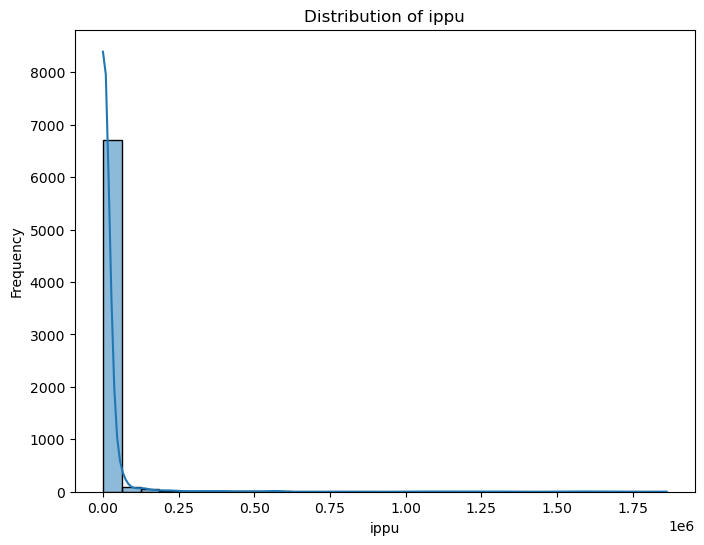

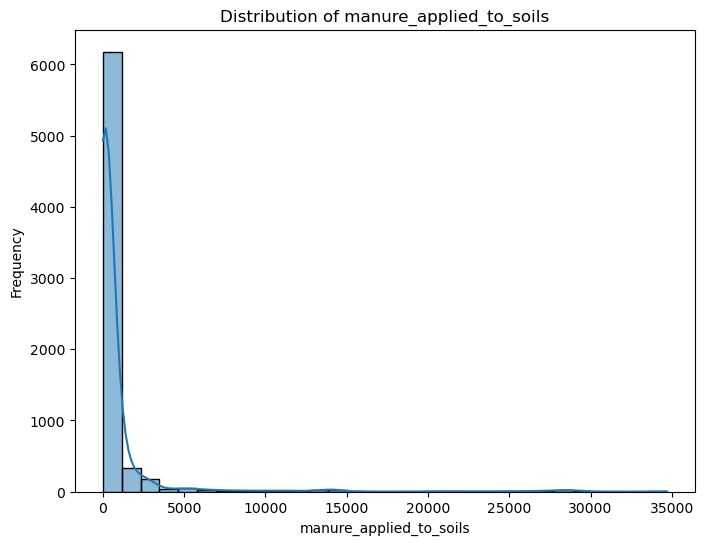

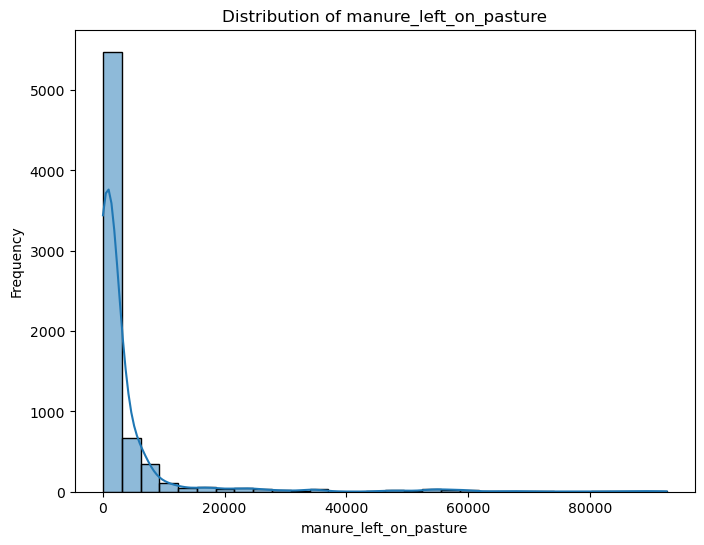

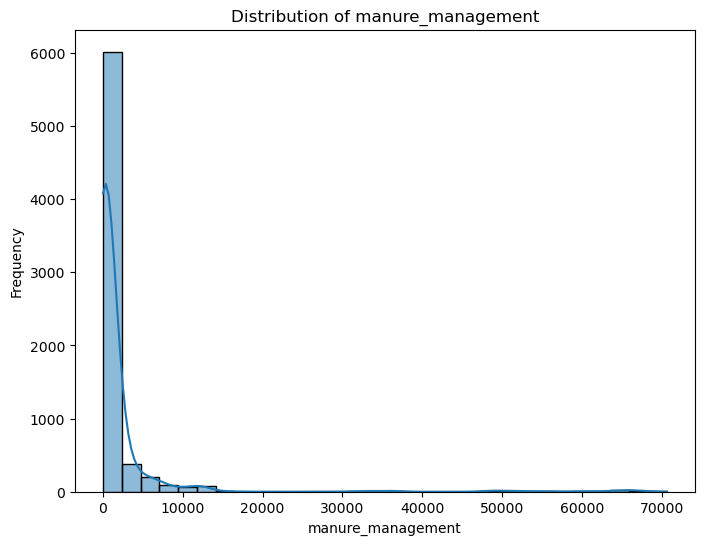

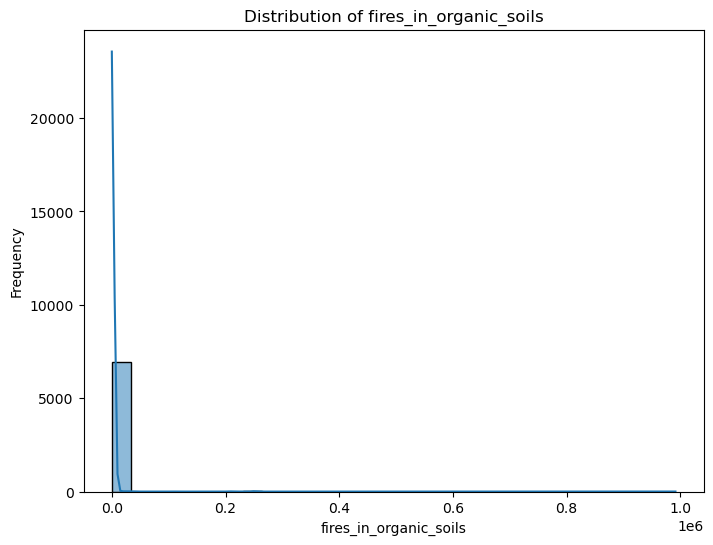

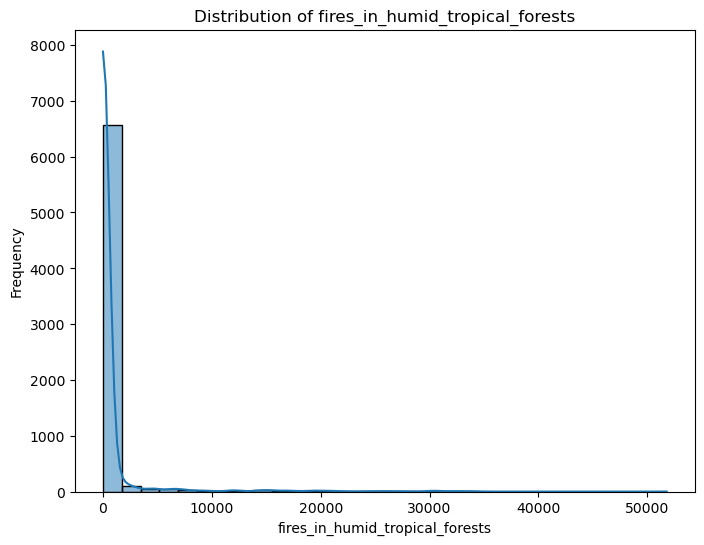

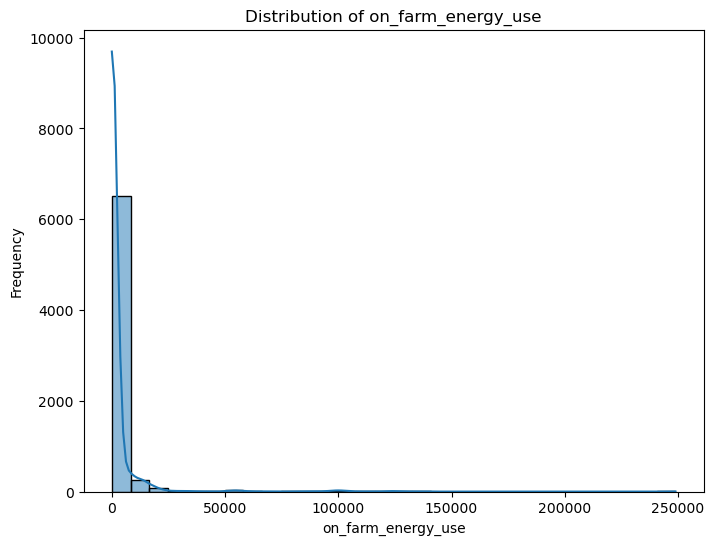

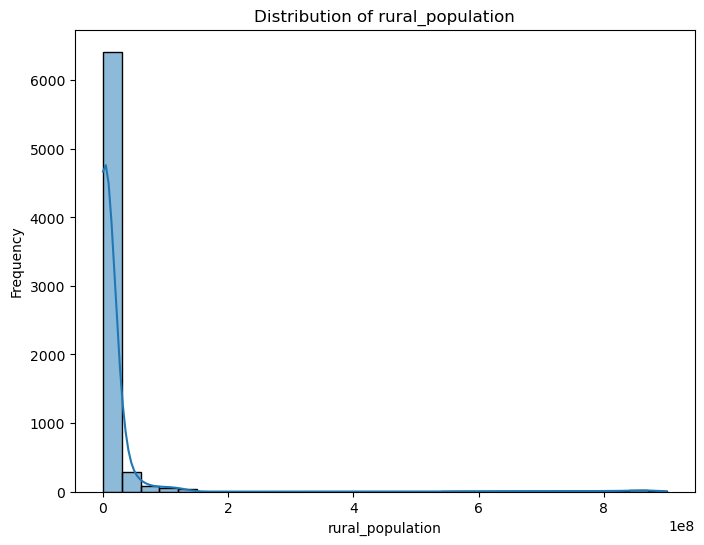

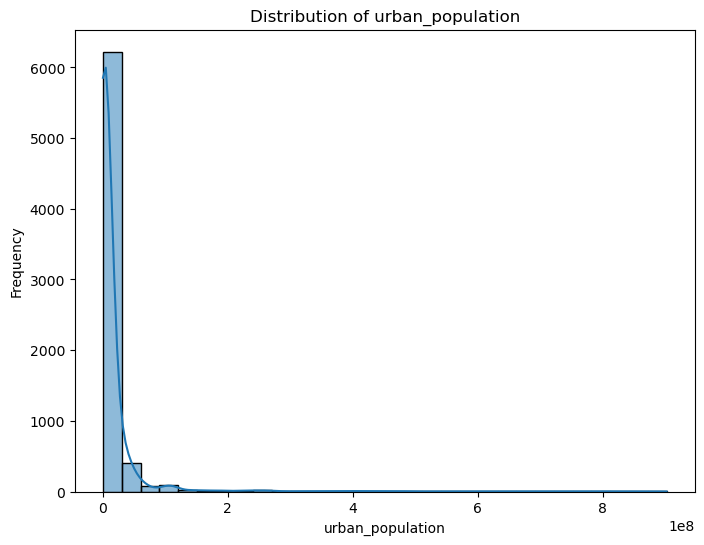

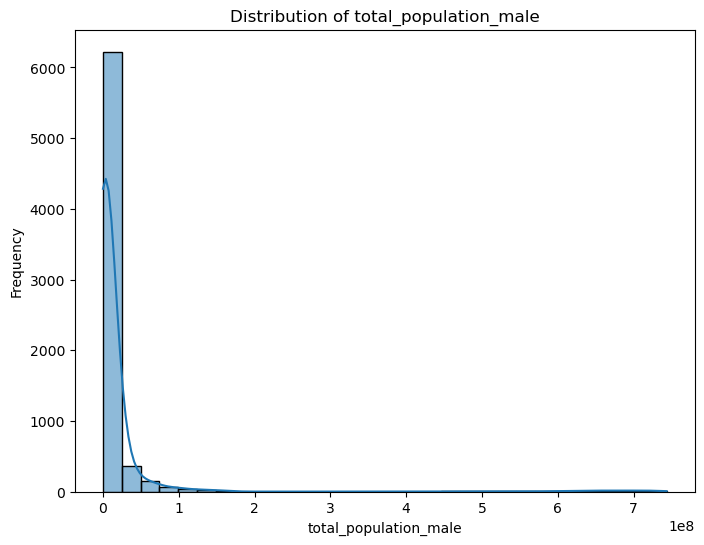

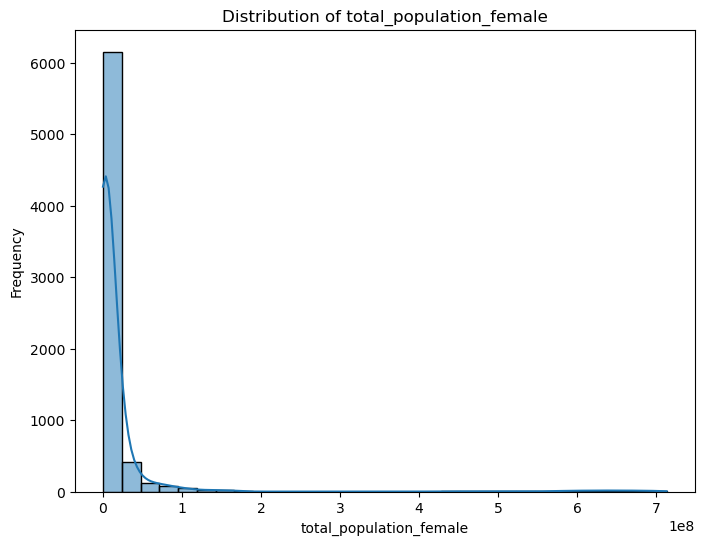

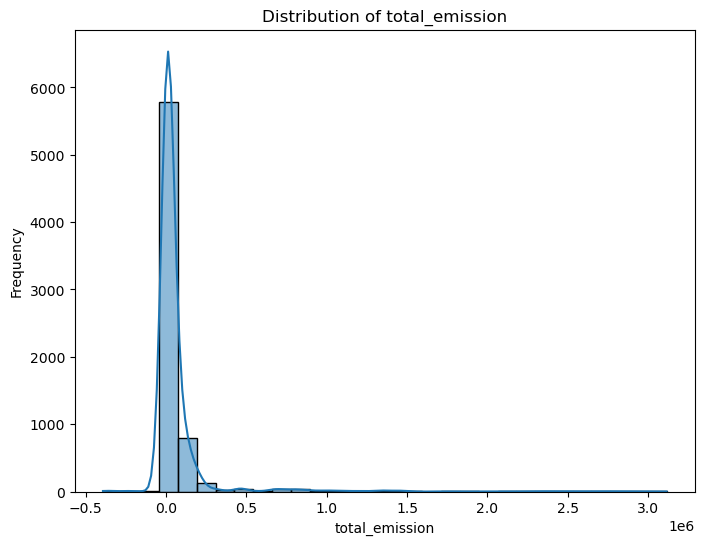

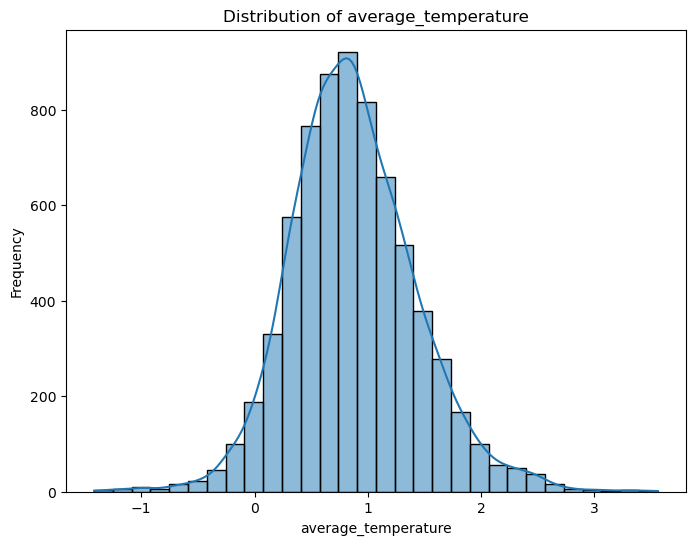

In [108]:


for i in columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data[i], kde=True, bins=30)
    plt.title(f"Distribution of {i}")
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()



In [109]:
columns

['savanna_fires',
 'forest_fires',
 'crop_residues',
 'rice_cultivation',
 'drained_organic_soils',
 'pesticides_manufacturing',
 'food_transport',
 'forestland',
 'net_forest_conversion',
 'food_household_consumption',
 'food_retail',
 'on_farm_electricity_use',
 'food_packaging',
 'agrifood_systems_waste_disposal',
 'food_processing',
 'fertilizers_manufacturing',
 'ippu',
 'manure_applied_to_soils',
 'manure_left_on_pasture',
 'manure_management',
 'fires_in_organic_soils',
 'fires_in_humid_tropical_forests',
 'on_farm_energy_use',
 'rural_population',
 'urban_population',
 'total_population_male',
 'total_population_female',
 'total_emission',
 'average_temperature']

In [110]:

from scipy.stats import skew, kurtosis


columns = [
    'savanna_fires', 'forest_fires', 'crop_residues', 'rice_cultivation', 
    'drained_organic_soils', 'pesticides_manufacturing', 'food_transport', 
    'forestland', 'net_forest_conversion', 'food_household_consumption', 
    'food_retail', 'on_farm_electricity_use', 'food_packaging', 
    'agrifood_systems_waste_disposal', 'food_processing', 
    'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils', 
    'manure_left_on_pasture', 'manure_management', 'fires_in_organic_soils', 
    'fires_in_humid_tropical_forests', 'on_farm_energy_use', 'rural_population', 
    'urban_population', 'total_population_male', 'total_population_female', 
    'total_emission', 'average_temperature', 'total_population'
]

# Function to classify skewness value
def classify_skewness(skew_value):
    if skew_value == 0:
        return 'Symmetric'
    elif skew_value < 0:
        return 'Negative Symmetric'
    else:
        return 'Positive Symmetric'

# Function to classify kurtosis value
def classify_kurtosis(kurtosis_value):
    if kurtosis_value == 3:
        return 'Normal(meso)'
    elif kurtosis_value < -3:
        return 'Platykurtic (Flat)'
    else:
        return 'Leptokurtic (Peaked)'


skewness_values = {}
kurtosis_values = {}


for column in columns:
    if column in data.columns:  
        skew_value = skew(data[column].dropna())
        kurt_value = kurtosis(data[column].dropna())
        
        skewness_values[column] = skew_value
        kurtosis_values[column] = kurt_value


skewness_classifications = pd.Series(skewness_values).apply(classify_skewness)
kurtosis_classifications = pd.Series(kurtosis_values).apply(classify_kurtosis)

# Combine all the results 
summary_df = pd.DataFrame({
    'Skewness': list(skewness_values.values()),
    'Skewness Classification': skewness_classifications,
    'Kurtosis': list(kurtosis_values.values()),
    'Kurtosis Classification': kurtosis_classifications
})

summary_df


,Skewness,Skewness Classification,Kurtosis,Kurtosis Classification
savanna_fires,10.344878,Positive Symmetric,157.009332,Leptokurtic (Peaked)
forest_fires,5.879944,Positive Symmetric,39.408299,Leptokurtic (Peaked)
crop_residues,6.860815,Positive Symmetric,49.962304,Leptokurtic (Peaked)
rice_cultivation,6.894809,Positive Symmetric,50.338835,Leptokurtic (Peaked)
drained_organic_soils,10.498672,Positive Symmetric,131.443083,Leptokurtic (Peaked)
pesticides_manufacturing,7.403491,Positive Symmetric,59.729366,Leptokurtic (Peaked)
food_transport,6.114712,Positive Symmetric,48.759063,Leptokurtic (Peaked)
forestland,-6.556071,Negative Symmetric,47.075153,Leptokurtic (Peaked)
net_forest_conversion,12.207766,Positive Symmetric,169.780942,Leptokurtic (Peaked)
food_household_consumption,11.759060,Positive Symmetric,163.463887,Leptokurtic (Peaked)


Heavily Positively Skewed Variables (Skewness > 1):

Most variables, such as savanna_fires, forest_fires, crop_residues, and others, have high positive skewness. This indicates that the distributions are right-skewed, with many data points concentrated near the lower values and a long tail towards the higher end.
Notable examples:
fires_in_organic_soils (26.2)
net_forest_conversion (12.1)
food_packaging (11.9)
These variables are likely dominated by a few extreme outliers.
Negatively Skewed Variables:

forestland is the only variable with significant negative skewness (-6.51). This indicates that most values are concentrated on the higher end with a tail extending toward smaller values.
Symmetry Around Zero:

Only average_temperature shows near-zero skewness (0.335), indicating a relatively symmetric distribution around the mean.
2. Kurtosis
Leptokurtic Distributions (Kurtosis > 3):

All variables exhibit leptokurtic characteristics, meaning their distributions are sharply peaked with heavy tails. This suggests the presence of numerous outliers.
Extremely peaked variables include:
fires_in_organic_soils (828.85)
net_forest_conversion (167.93)
food_household_consumption (161.69)
ippu (159.81)
These variables are likely dominated by extreme high values, making them ideal candidates for outlier detection and handling.
Low Kurtosis Variables:

Only average_temperature has relatively low kurtosis (1.04), indicating a closer-to-normal distribution compared to others.
3. Variables to Investigate
Features with Extremely High Skewness and Kurtosis:

Variables such as fires_in_organic_soils, net_forest_conversion, and food_packaging are strong candidates for transformation (e.g., log-transformation, normalization) to reduce their impact on modeling. These are particularly dominated by outliers.
Features with Negative Skewness:

forestland shows significant negative skewness. Investigating its distribution and context (e.g., restored forests or unique geographical conditions) may yield valuable insights.
Population Variables:

Variables like total_population_male, total_population_female, and total_population are all heavily skewed and peaked, potentially because they span countries with drastically different populations. These should be normalized if included in modeling.
4. Key Actions

# 5.  Bivariate Analysis


Top 20 Areas Contributing to Average Temperature:
area
Luxembourg            1.545921
Serbia                1.526917
Estonia               1.522491
Belarus               1.495724
Belgium               1.485413
Latvia                1.484609
Russian Federation    1.483595
Montenegro            1.458567
Finland               1.452164
Lithuania             1.439224
Slovenia              1.437799
Mongolia              1.404602
Austria               1.393145
Czechia               1.381616
Sweden                1.367548
Mauritania            1.351957
Liechtenstein         1.349468
Switzerland           1.347153
Germany               1.325390
Kuwait                1.309296
Name: average_temperature, dtype: float64


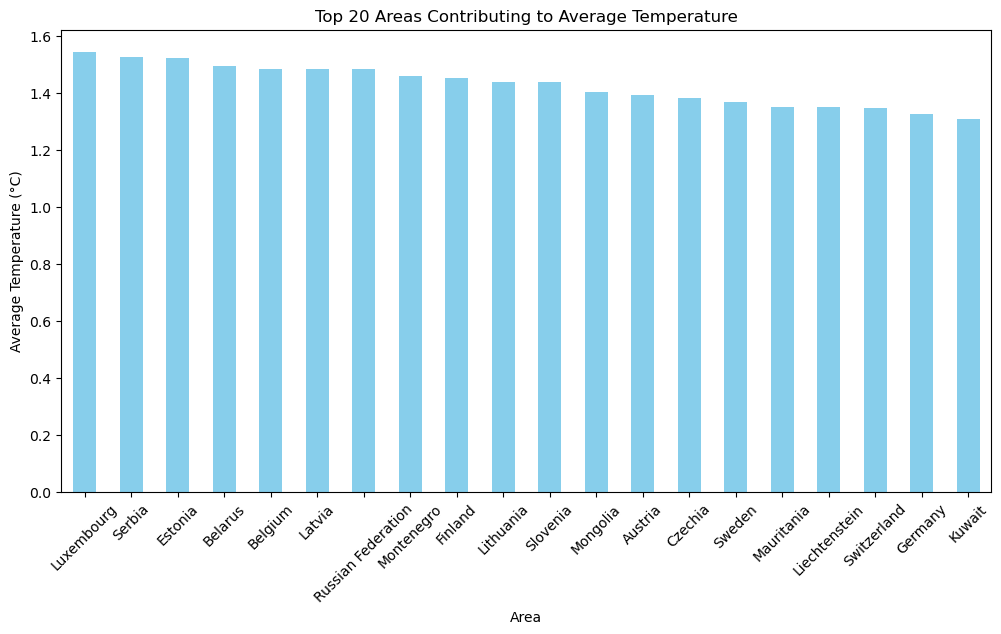

In [111]:
area_avg_temp = data.groupby('area')['average_temperature'].mean().sort_values(ascending=False)
    
    # Select the top 10 areas contributing to the average temperature
top_20_areas = area_avg_temp.head(20)
    
    # Display the top 10 areas and their average temperatures
print("Top 20 Areas Contributing to Average Temperature:")
print(top_20_areas)
    
    # Plot the top 10 areas
top_20_areas.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 20 Areas Contributing to Average Temperature')
plt.xlabel('Area')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

In [112]:
## The above are the area which average temperature raise is high among all the contries

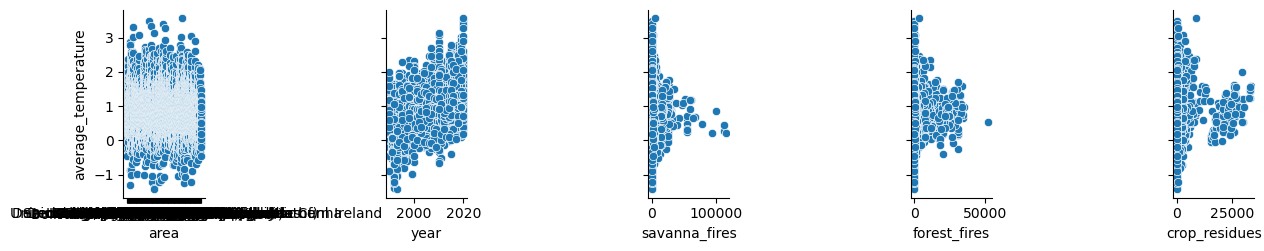

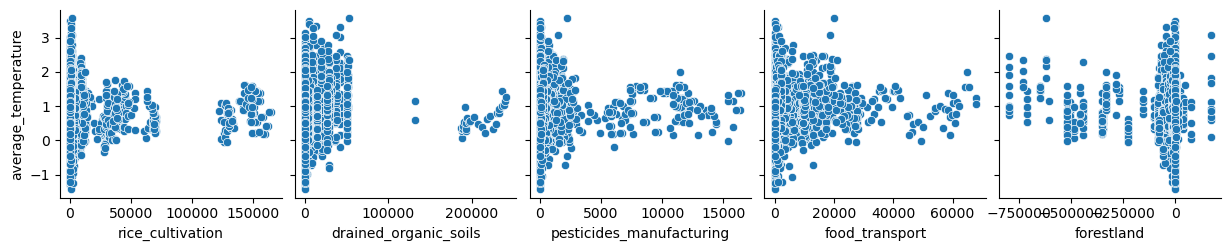

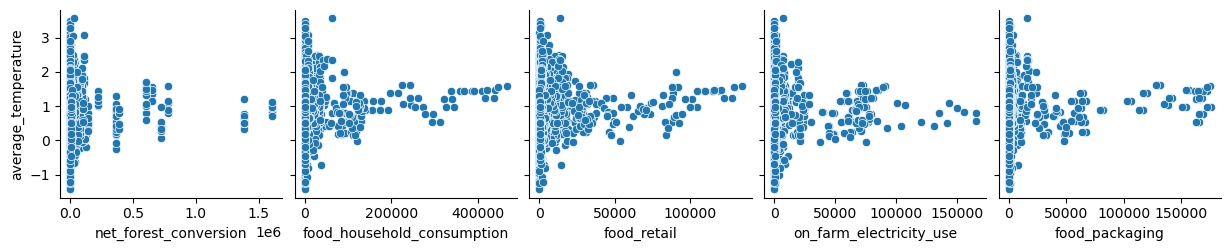

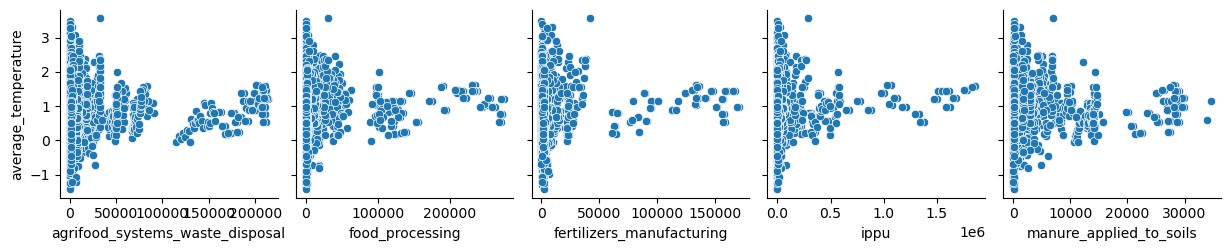

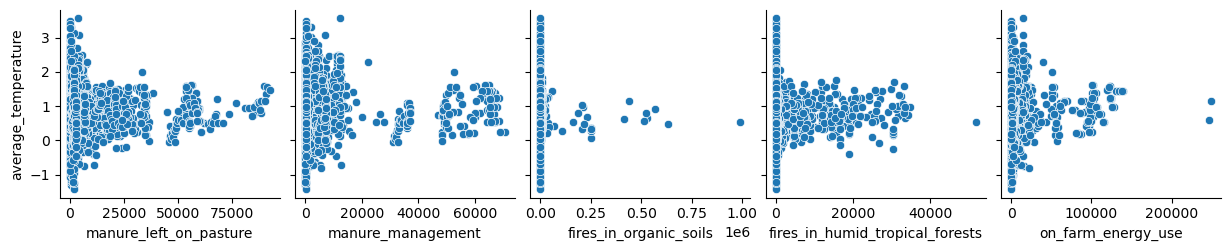

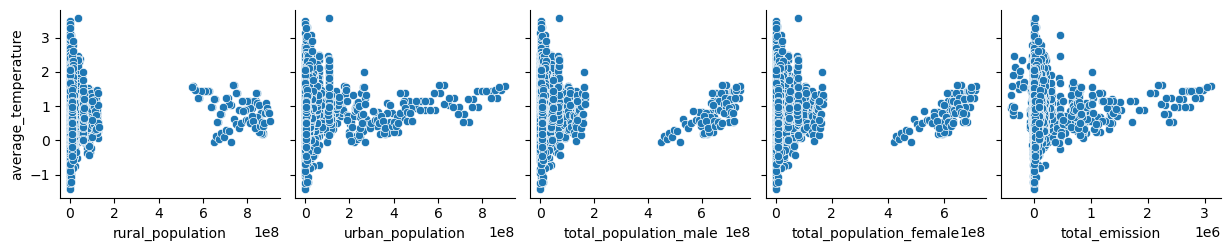

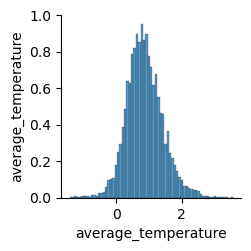

In [113]:
for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['average_temperature'])

In [114]:
# 6 MULTIVARIATE ANALYSIS

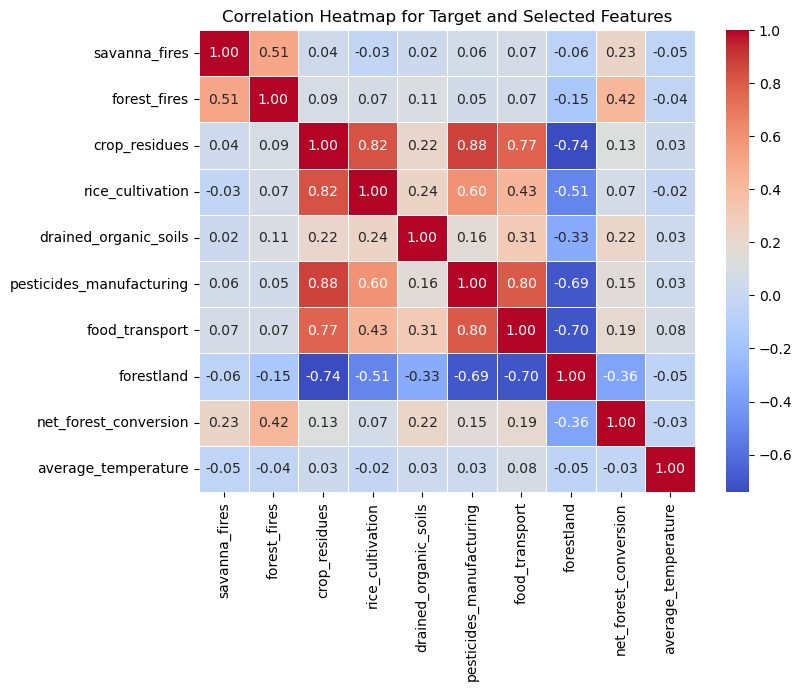

In [115]:

features_of_interest = ['savanna_fires', 'forest_fires', 'crop_residues',
       'rice_cultivation', 'drained_organic_soils', 'pesticides_manufacturing',
       'food_transport', 'forestland', 'net_forest_conversion','average_temperature']
       

# Subset the correlation matrix
subset_corr = data[features_of_interest].corr()

# Create heatmap for subset
plt.figure(figsize=(8, 6))
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Target and Selected Features')
plt.show()


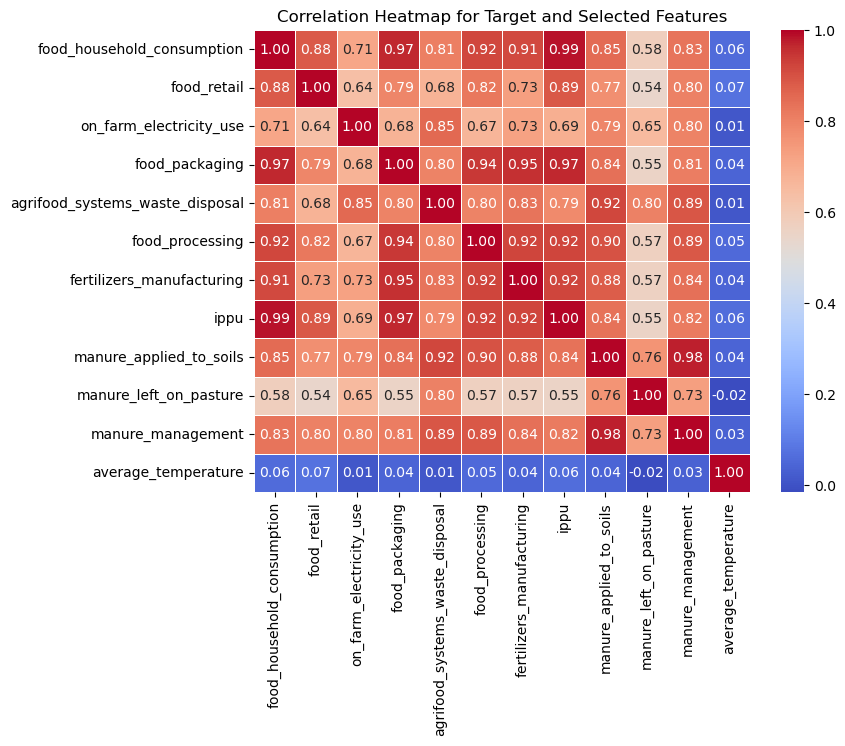

In [116]:
features_of_interest =['food_household_consumption', 'food_retail', 'on_farm_electricity_use',
       'food_packaging', 'agrifood_systems_waste_disposal', 'food_processing',
       'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils',
       'manure_left_on_pasture', 'manure_management','average_temperature']

# Subset the correlation matrix
subset_corr = data[features_of_interest].corr()

# Create heatmap for subset
plt.figure(figsize=(8, 6))
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Target and Selected Features')
plt.show()

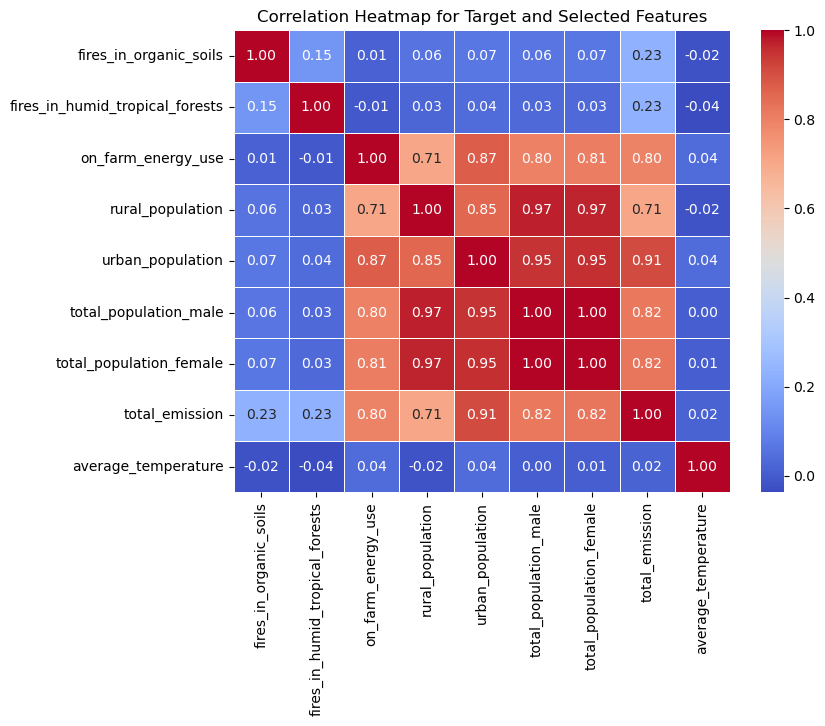

In [118]:
features_of_interest=[ 'fires_in_organic_soils',
       'fires_in_humid_tropical_forests', 'on_farm_energy_use',
       'rural_population', 'urban_population', 'total_population_male',
       'total_population_female', 'total_emission' ,'average_temperature']
# Subset the correlation matrix
subset_corr = data[features_of_interest].corr()

# Create heatmap for subset
plt.figure(figsize=(8, 6))
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Target and Selected Features')
plt.show()

No Linear Relationship: A correlation close to 0 (whether positive or negative) indicates that the feature does not linearly affect the target. Therefore, if we are using techniques like linear regression that assume linear relationships, these features likely aren't contributing much.

Non-Linear Relationships: Correlation only measures linear relationships. If the target has a non-linear relationship with these variables (for example, through curves, thresholds, or complex patterns), correlation won’t capture that. In such cases, even a small correlation might not mean that the feature is unimportant. we might need to check for non-linear relationships or test using non-linear models like decision trees, random forests, SVMs, etc.

# 7. Feature engineering

In [ ]:
data.columns

Index(['area', 'year', 'savanna_fires', 'forest_fires', 'crop_residues',
       'rice_cultivation', 'drained_organic_soils', 'pesticides_manufacturing',
       'food_transport', 'forestland', 'net_forest_conversion',
       'food_household_consumption', 'food_retail', 'on_farm_electricity_use',
       'food_packaging', 'agrifood_systems_waste_disposal', 'food_processing',
       'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils',
       'manure_left_on_pasture', 'manure_management', 'fires_in_organic_soils',
       'fires_in_humid_tropical_forests', 'on_farm_energy_use',
       'rural_population', 'urban_population', 'total_population_male',
       'total_population_female', 'total_emission', 'average_temperature'],
      dtype='object')

In [ ]:
data['total_population'] = data.total_population_female + data.total_population_male
data['emission_per_person'] = data.total_emission / data.total_population

data.head()

,area,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils,pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,food_retail,on_farm_electricity_use,food_packaging,agrifood_systems_waste_disposal,food_processing,fertilizers_manufacturing,ippu,manure_applied_to_soils,manure_left_on_pasture,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on_farm_energy_use,rural_population,urban_population,total_population_male,total_population_female,total_emission,average_temperature,total_population,emission_per_person
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,10694796.0,0.000206
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,10745167.0,0.000216
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,12057433.0,0.000195
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,14003760.0,0.000169
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,15455554.0,0.000162


# Analysis

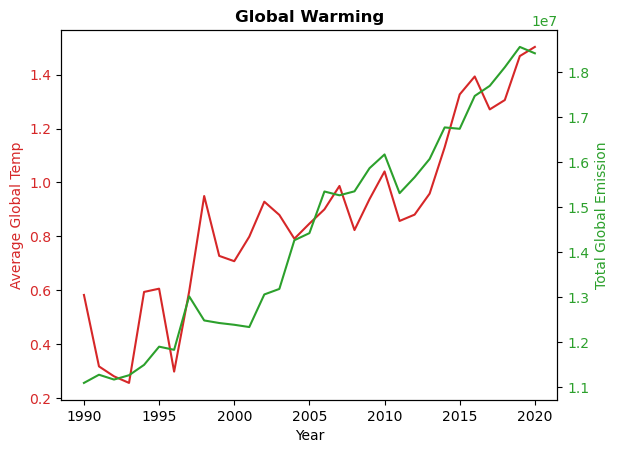

In [ ]:
df_year = data.groupby('year')
avg_temp = df_year.average_temperature.mean()
total_global_emission = df_year.total_emission.sum()
x = avg_temp.index

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Global Temp', color = color)
ax1.plot(x, avg_temp, color = color)
ax1.tick_params(axis ='y', labelcolor = color)

# Adding Twin Axes to plot global emissions to the right
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total Global Emission', color = color)
ax2.plot(x, total_global_emission, color = color)
ax2.tick_params(axis ='y', labelcolor = color)
plt.title('Global Warming', fontweight ="bold")
plt.show()

with increase in total global emission average temperarture raises year by year

In [ ]:
### urban population is increasing rapidly which resulting in average temperature raise.

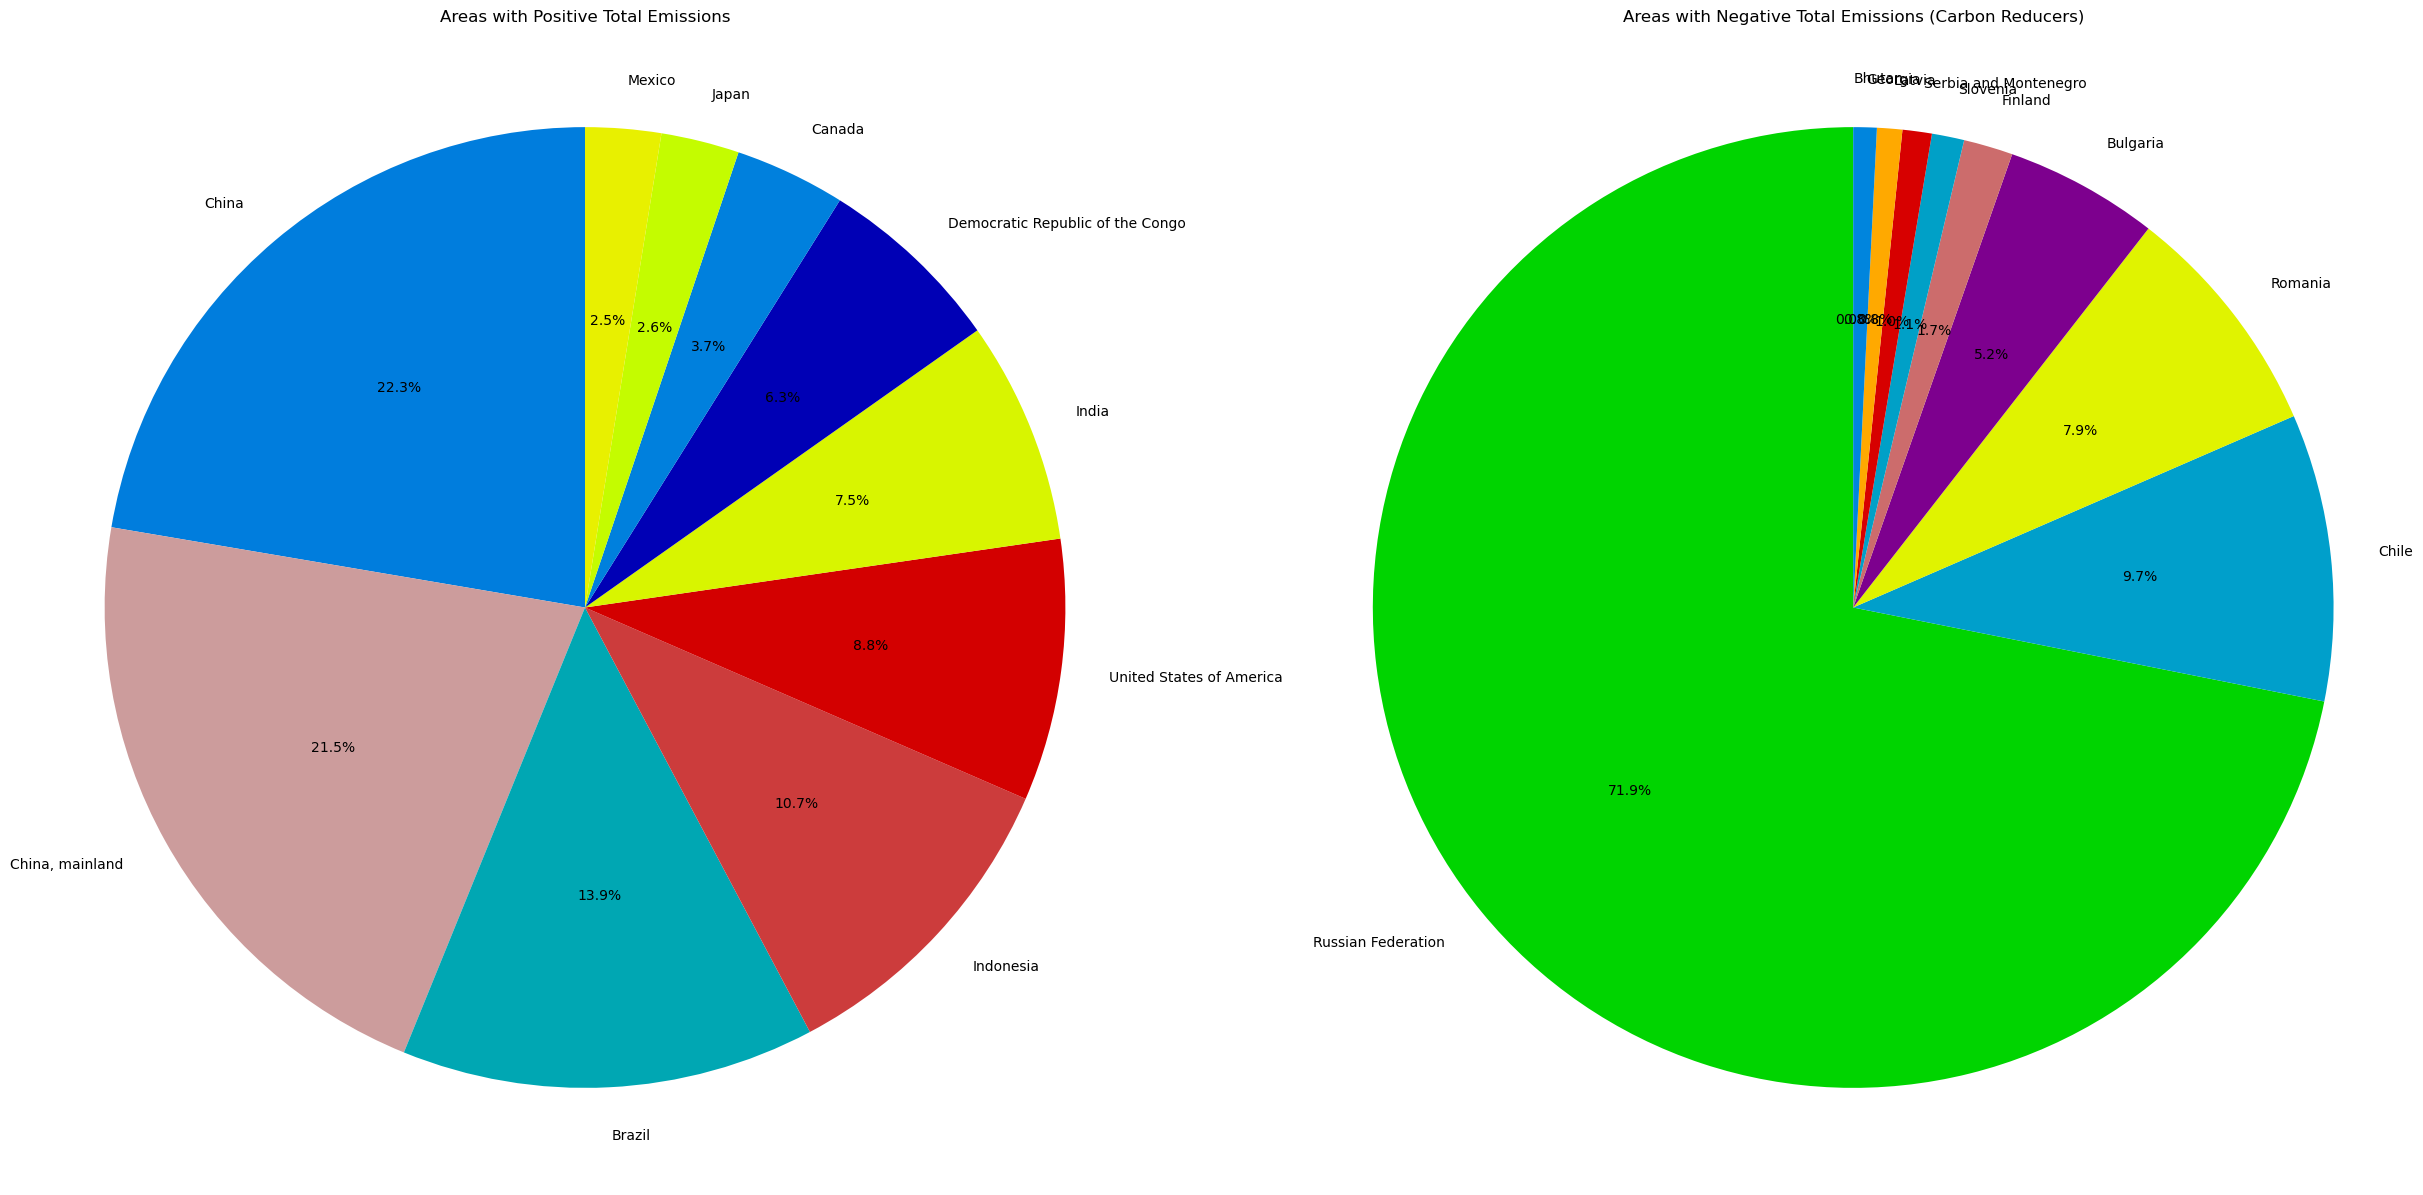

In [ ]:
# Generate a color map with a unique color for each area
unique_areas = data['area'].unique()
np.random.shuffle(unique_areas)
colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(unique_areas)))
area_colors = {area: color for area, color in zip(unique_areas, colors)}
# Calculate the total emissions for each area
total_emissions = data.groupby('area')['total_emission'].sum()
# Filter areas with positive and negative total emissions
positive_emissions = total_emissions[total_emissions > 0]
negative_emissions = total_emissions[total_emissions < 0].abs()
# Generate the pie charts
fig, ax = plt.subplots(1, 2, figsize=(30, 15))
for i, emissions in enumerate([positive_emissions, negative_emissions]):
    emissions = emissions.sort_values(ascending=False).head(10)
    ax_i = ax[i]
    ax_i.pie(emissions, labels=emissions.index,
             colors=[area_colors[area] for area in emissions.index],
             autopct='%1.1f%%', startangle=90)
    ax_i.axis('equal')
ax[0].set_title('Areas with Positive Total Emissions')
ax[1].set_title('Areas with Negative Total Emissions (Carbon Reducers)')

plt.show()

In [ ]:
# china and Brazil are major co2 emittors and russian is the major carbon redusor